In [1]:
%cd ..

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
from scripts.operator_approx import cheb_op_ap
from scripts.adjacency_to_super import create_super_adjacency, generate_opp_approx
from scripts.ulams_method import ulams_method
from scripts.hofbauer_functions import create_adjacency_matricies


/Users/adrianzhao/opt/anaconda3/envs/py3.12.3/lib/python3.12/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


/Users/adrianzhao/Documents/Denison/DENR3901-main


In [2]:
# Tent map functions and adjacency matrices
alpha = 1.9  # Parameter for the tent map

def tent_map(x):
    return alpha * np.minimum(x, 1 - x)

# Left branch operator
def L_left(phi):
    return lambda x: np.where((x >= 0) & (x <= alpha / 2), (1 / alpha) * phi(x / alpha), np.nan)

# Right branch operator
def L_right(phi):
    return lambda x: np.where((x >= 0) & (x <= alpha / 2), (1 / alpha) * phi(1 - x / alpha), np.nan)

# Full transfer operator
def L(phi):
    return lambda x: np.where((x >= 0) & (x <= alpha / 2), 
                              (1 / alpha) * (phi(x / alpha) + phi(1 - x / alpha)), 0)

In [3]:
# # just sample data. Comes from the left branch of the tent map for alpha=1.9. Just copied over for now.

# domains = [
#     (0.0, 1.0),
#     (0.0, 0.95),
#     (0.095, 0.95),
#     (0.1805, 0.95),
#     (0.34295, 0.95),
#     (0.651605, 0.95),
#     (0.095, 0.6619505),
#     (0.64229405, 0.95),
#     (0.095, 0.67964131),
#     (0.60868151, 0.95),
#     (0.095, 0.74350513),
#     (0.48734025, 0.95),
#     (0.92594647, 0.95),
#     (0.095, 0.14070171),
#     (0.1805, 0.26733325),
#     (0.34295, 0.50793318)
# ]

# left_matrix = np.array(
#     [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#     [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0],
#     [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]]
# )


# right_matrix = np.array(
#     [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#     [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
# )

In [4]:
# Parameters for Chebyshev approximation
K_values = [10, 20, 50, 100, 200]  # Number of Chebyshev points
depth_values = [5, 10, 15, 20, 50]  # Depth of approximation

# Investigating eigenvalue errors
eigenvalue_errors = []
for K in K_values:
    for depth in depth_values:

        result = create_adjacency_matricies(alpha, depth)
        domains = result[0]
        left_matrix = result[2]
        right_matrix = result[3]
        
        # Create super-adjacency matrices, adjusting based on the current depth
        super_adjacency_matrix_left = create_super_adjacency(left_matrix, domains, L_left, K, K, 1)
        super_adjacency_matrix_right = create_super_adjacency(right_matrix, domains, L_right, K, K, 1)
        super_adjacency_matrix = super_adjacency_matrix_left + super_adjacency_matrix_right
        
        # Eigenvalues for super adjacency
        evals_super = np.linalg.eigvals(super_adjacency_matrix)
        evals_super = evals_super[np.argsort(-np.abs(evals_super))]
        
        # Full map eigenvalues, adjusting based on the current depth
        L_hat = cheb_op_ap(L, K, K, (0, 1), (0, 1), 1).T  # Include depth in the operator
        evals_full_map = np.linalg.eigvals(L_hat)
        evals_full_map = evals_full_map[np.argsort(-np.abs(evals_full_map))]
        
        # Error for largest eigenvalue
        largest_eigenvalue_super = evals_super[0]
        largest_eigenvalue_full_map = evals_full_map[0]
        error = np.abs(largest_eigenvalue_super - 1)
        
        eigenvalue_errors.append((K, depth, error))

# Print out the errors for verification
print("Eigenvalue errors:", eigenvalue_errors)


Eigenvalue errors: [(10, 5, 0.03195433936096692), (10, 10, 0.0026604083371837284), (10, 15, 2.6872300683877803e-05), (10, 20, 1.2927365062864737e-06), (10, 50, 9.123102273633776e-11), (20, 5, 0.03195433936096692), (20, 10, 0.0026604083371837284), (20, 15, 2.6872300684321893e-05), (20, 20, 1.29273650273376e-06), (20, 50, 9.122969046870821e-11), (50, 5, 0.031954339360967476), (50, 10, 0.002660408337182396), (50, 15, 2.687230068132429e-05), (50, 20, 1.292736504510117e-06), (50, 50, 9.122391730898016e-11), (100, 5, 0.03195433936096648), (100, 10, 0.002660408337177622), (100, 15, 2.6872300682878603e-05), (100, 20, 1.2927365066195406e-06), (100, 50, 9.122747002265896e-11), (200, 5, 0.0319543393609677), (200, 10, 0.0026604083371780662), (200, 15, 2.687230068376678e-05), (200, 20, 1.2927365042880723e-06), (200, 50, 9.122791411186881e-11)]


[[1.00000000e+01 5.00000000e+00 3.19543394e-02]
 [1.00000000e+01 1.00000000e+01 2.66040834e-03]
 [1.00000000e+01 1.50000000e+01 2.68723007e-05]
 [1.00000000e+01 2.00000000e+01 1.29273651e-06]
 [1.00000000e+01 5.00000000e+01 9.12310227e-11]
 [2.00000000e+01 5.00000000e+00 3.19543394e-02]
 [2.00000000e+01 1.00000000e+01 2.66040834e-03]
 [2.00000000e+01 1.50000000e+01 2.68723007e-05]
 [2.00000000e+01 2.00000000e+01 1.29273650e-06]
 [2.00000000e+01 5.00000000e+01 9.12296905e-11]
 [5.00000000e+01 5.00000000e+00 3.19543394e-02]
 [5.00000000e+01 1.00000000e+01 2.66040834e-03]
 [5.00000000e+01 1.50000000e+01 2.68723007e-05]
 [5.00000000e+01 2.00000000e+01 1.29273650e-06]
 [5.00000000e+01 5.00000000e+01 9.12239173e-11]
 [1.00000000e+02 5.00000000e+00 3.19543394e-02]
 [1.00000000e+02 1.00000000e+01 2.66040834e-03]
 [1.00000000e+02 1.50000000e+01 2.68723007e-05]
 [1.00000000e+02 2.00000000e+01 1.29273651e-06]
 [1.00000000e+02 5.00000000e+01 9.12274700e-11]
 [2.00000000e+02 5.00000000e+00 3.195433

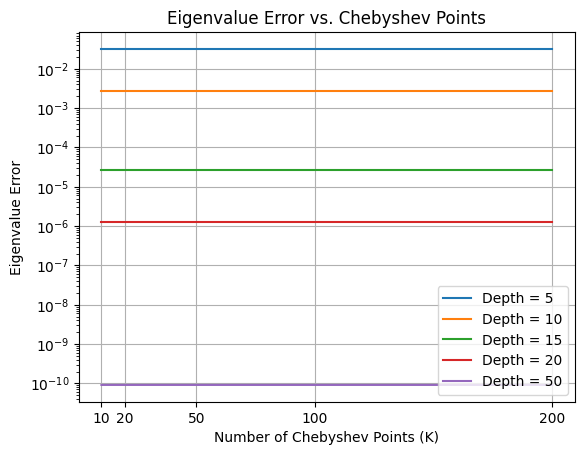

In [5]:
# Plotting eigenvalue errors
eigenvalue_errors = np.array(eigenvalue_errors)
print(eigenvalue_errors)
for depth in depth_values:
    errors_at_depth = eigenvalue_errors[eigenvalue_errors[:, 1] == depth]
    plt.plot(errors_at_depth[:, 0], errors_at_depth[:, 2], label=f"Depth = {depth}")

# Set x-axis to log scale
#plt.xscale("log")

# Set y-axis to log scale
plt.yscale("log")

# Custom x-axis ticks
x_ticks = K_values  # Use the K values as x-ticks
plt.xticks(x_ticks, labels=[f"{k}" for k in x_ticks])

# Custom y-axis ticks
#y_ticks = np.logspace(-3, -1, 3)  # Generate ticks from 10^-5 to 10^-1
#plt.yticks(y_ticks, labels=[f"$10^{{{int(np.log10(y))}}}$" for y in y_ticks])

# Add labels and legend
plt.xlabel("Number of Chebyshev Points (K)")
plt.ylabel("Eigenvalue Error")
plt.title("Eigenvalue Error vs. Chebyshev Points")
plt.legend()
plt.grid()
plt.show()


In [6]:
'''# Compute Constants
constants = []

for K in K_values:
    for depth in depth_values:
        # Create super-adjacency matrices, adjusting based on the current depth
        super_adjacency_matrix_left = create_super_adjacency(left_matrix, domains, L_left, K, K, depth)
        super_adjacency_matrix_right = create_super_adjacency(right_matrix, domains, L_right, K, K, depth)
        super_adjacency_matrix = super_adjacency_matrix_left + super_adjacency_matrix_right
        
        # Eigenvalues for super adjacency
        evals_super = np.linalg.eigvals(super_adjacency_matrix)
        evals_super = evals_super[np.argsort(-np.abs(evals_super))]
        
        # Full map eigenvalues, adjusting based on the current depth
        L_hat = cheb_op_ap(L, K, K, (0, 1), (0, 1), depth).T  # Include depth in the operator
        evals_full_map = np.linalg.eigvals(L_hat)
        evals_full_map = evals_full_map[np.argsort(-np.abs(evals_full_map))]
        
        # Largest eigenvalue for both matrices
        largest_eigenvalue_super = evals_super[0]
        largest_eigenvalue_full_map = evals_full_map[0]
        
        # C: Difference between largest eigenvalues (super adjacency vs full map)
        C = np.abs(largest_eigenvalue_super - largest_eigenvalue_full_map)
        
        # C1, C2: Constants related to the matrices (e.g., second and third eigenvalues)
        C1 = np.abs(evals_super[1])  # You can modify this as needed
        C2 = np.abs(evals_full_map[1])  # You can modify this as needed
        
        # Xi: Error term or refinement constant (difference between the eigenvalues for different depths)
        Xi = np.abs(largest_eigenvalue_super - largest_eigenvalue_full_map) / depth
        
        # Store the constants
        constants.append((K, depth, C, C1, C2, Xi))

# Print the constants for verification
for K, depth, C, C1, C2, Xi in constants:
    print(f"K={K}, Depth={depth}, C={C:.4f}, C1={C1:.4f}, C2={C2:.4f}, Xi={Xi:.4f}")'''


'# Compute Constants\nconstants = []\n\nfor K in K_values:\n    for depth in depth_values:\n        # Create super-adjacency matrices, adjusting based on the current depth\n        super_adjacency_matrix_left = create_super_adjacency(left_matrix, domains, L_left, K, K, depth)\n        super_adjacency_matrix_right = create_super_adjacency(right_matrix, domains, L_right, K, K, depth)\n        super_adjacency_matrix = super_adjacency_matrix_left + super_adjacency_matrix_right\n        \n        # Eigenvalues for super adjacency\n        evals_super = np.linalg.eigvals(super_adjacency_matrix)\n        evals_super = evals_super[np.argsort(-np.abs(evals_super))]\n        \n        # Full map eigenvalues, adjusting based on the current depth\n        L_hat = cheb_op_ap(L, K, K, (0, 1), (0, 1), depth).T  # Include depth in the operator\n        evals_full_map = np.linalg.eigvals(L_hat)\n        evals_full_map = evals_full_map[np.argsort(-np.abs(evals_full_map))]\n        \n        # Largest ei